# Pymaceuticals Inc.
---

### Analysis

- This analysis included a study of 248 mice who had tumors and received treatment with a number of different drug regimens. 
- The correlation between mouse weight and the average tumor volume is 0.84. This suggests that there is a strong positive association with the two variables.
- If you observe the data, you will notice that on Capomulin the mice lose weight and their tumor size goes down. 
-On average, Capomulin & Ramicane are the most effective drugs that significantly lower the tumor volume size. 
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
merge_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_column = merge_data['Mouse ID'].unique()
mice_count = len(mice_column)
mice_count


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate_ID = merge_data.loc[merge_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicate_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_df = merge_data.loc[merge_data["Mouse ID"] == "g989", :]
mice_duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe=merge_data[merge_data["Mouse ID"]!="g989"]
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Checking the number of mice in the clean DataFrame.
clean_data_count = clean_dataframe['Mouse ID'].nunique()

clean_data_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_data = clean_dataframe.set_index(["Drug Regimen"])
groupby_regimen_data = regimen_data.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = groupby_regimen_data["Tumor Volume (mm3)"].mean()
regimen_median = groupby_regimen_data["Tumor Volume (mm3)"].median()
regimen_variance = groupby_regimen_data["Tumor Volume (mm3)"].var()
regimen_std = groupby_regimen_data["Tumor Volume (mm3)"].std()
regimen_sem = groupby_regimen_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
regimen_df = pd.DataFrame({"Mean Tumor Volume" : regimen_mean,
                           "Median Tumor Volume" : regimen_median,
                           "Tumor Volume Variance" : regimen_variance,
                           "Tumor Volume Std. Dev" : regimen_std,
                           "Tumor Volume Std. Err" : regimen_sem}
                         )
regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_method_regimen = clean_dataframe.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregation_method_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

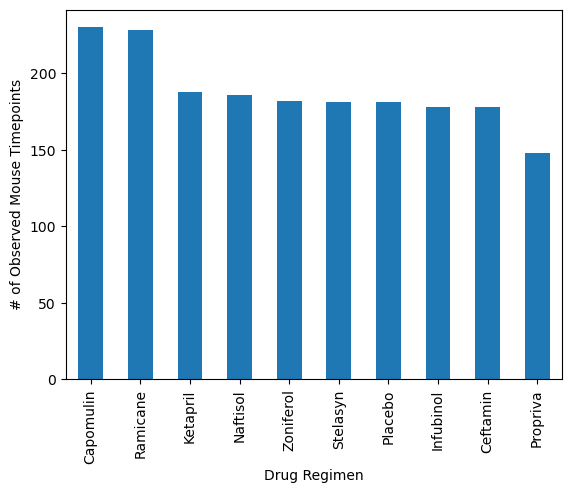

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mcount = clean_dataframe["Drug Regimen"].value_counts()

#Plot Labels
plot_pandas_mice = mcount.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

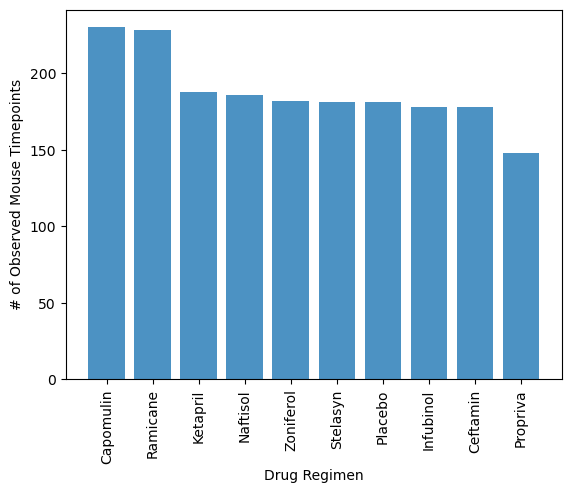

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_ax = mcount.index.values
y_ax = mcount.values

plt.bar(x_ax, y_ax, alpha=0.8, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

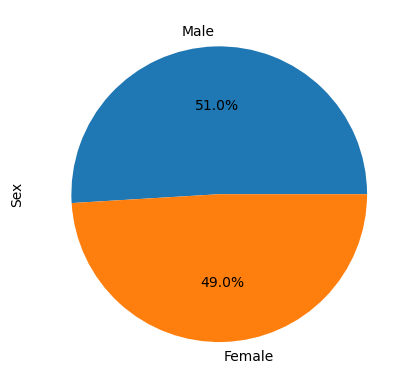

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_distribution = clean_dataframe["Sex"].value_counts()
Sex = ["Male", "Female"]
mice_distribution.plot(kind = "pie", autopct="%1.1f%%", ylabel="Sex")
plt.show()

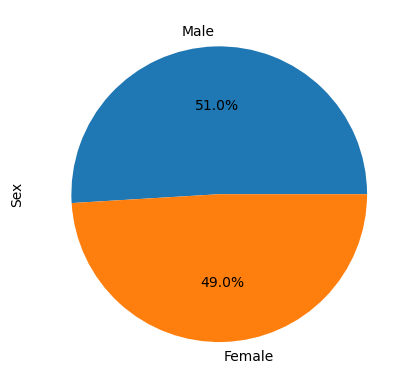

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_label = mice_distribution.index.values
sex_count = mice_distribution.values
plt.pie(sex_count, labels= mice_label, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_dataframe.groupby("Mouse ID")
last_timepoint=last_timepoint["Timepoint"].max()
last_timepoint_df=pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
volume_df=pd.merge(last_timepoint_df, clean_dataframe, on = ["Mouse ID", "Timepoint"])
volume_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [27]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_names=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_capo= []
tumor_volume_rami= []
tumor_volume_infu= []
tumor_volume_ceft= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for b in range(len(volume_df)-1):
    if volume_df.loc[b, "Drug Regimen"] == "Capomulin":
        tumor_volume_capo.append(volume_df.loc[b, "Tumor Volume (mm3)"])
    if volume_df.loc[b, "Drug Regimen"] == "Ramicane":
        tumor_volume_rami.append(volume_df.loc[b, "Tumor Volume (mm3)"])
    if volume_df.loc[b, "Drug Regimen"] == "Infubinol":
        tumor_volume_infu.append(volume_df.loc[b, "Tumor Volume (mm3)"])
    if volume_df.loc[b, "Drug Regimen"] == "Ceftamin":
        tumor_volume_ceft.append(volume_df.loc[b, "Tumor Volume (mm3)"])

final_volume=[tumor_volume_capo, tumor_volume_rami, tumor_volume_infu, tumor_volume_ceft]
outlier= []

   
for b in range(len(final_volume)):

    quartiles = pd.Series(final_volume[b]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatment_names[b]}:")

  
    print(f"The interquartile range of tumor volume is: {iqr}")
   

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
# Determine outliers using upper and lower bounds      
for a in range(len(final_volume[b])):
    if (final_volume[b][a] < lower_bound) or (final_volume[b][a] > upper_bound):
        the_outlier = final_volume[b][a]
        outlier.append(the_outlier)
        print(f"The outliers are {outlier}.")


Capomulin:
The interquartile range of tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The interquartile range of tumor volume is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The interquartile range of tumor volume is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The interquartile range of tumor volume is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


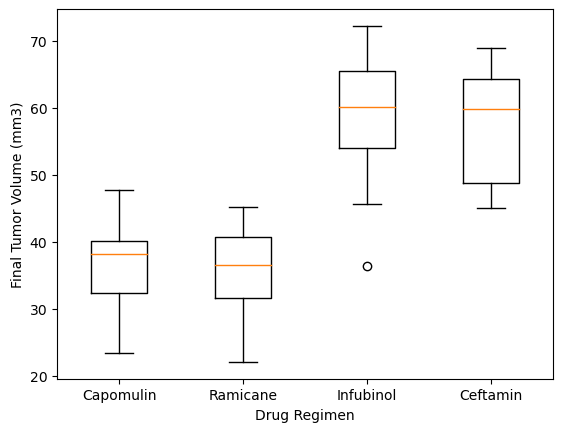

In [44]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(final_volume, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

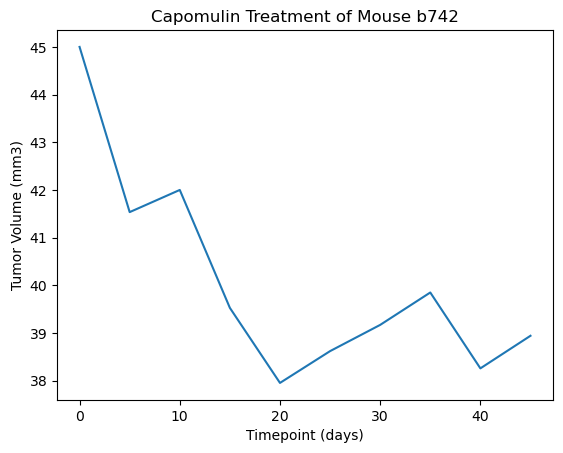

In [51]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
volume_df.loc[volume_df["Drug Regimen"]== "Capomulin"].head()

def tumor_line_plot(regimen,mouse_id):
    regimen_data = clean_dataframe.loc[clean_dataframe["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data["Mouse ID"] == mouse_id]
    plt.plot(data_by_id["Timepoint"], data_by_id["Tumor Volume (mm3)"])
    plt.xlabel("Timepoint (days)")
    plt.ylabel("Tumor Volume (mm3)")
    plt.title(regimen + " Treatment of" +  " Mouse " + mouse_id)
    plt.show()
    
tumor_line_plot("Capomulin", "b742")
    
    

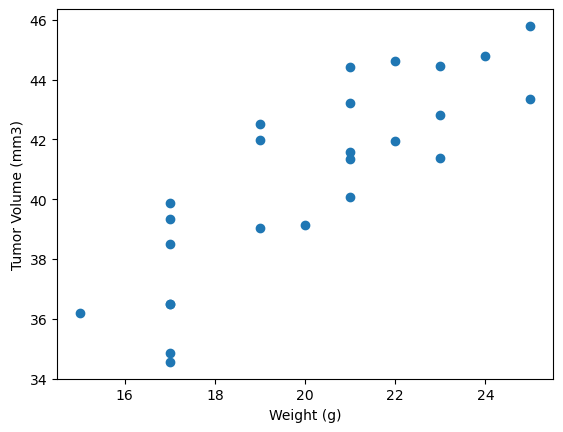

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_dataframe.loc[(clean_dataframe["Drug Regimen"] == "Capomulin")]
group_capomulin_df = capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_obs_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_obs_tumor_vol})
#graph build and display
plt.scatter(weight, avg_obs_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


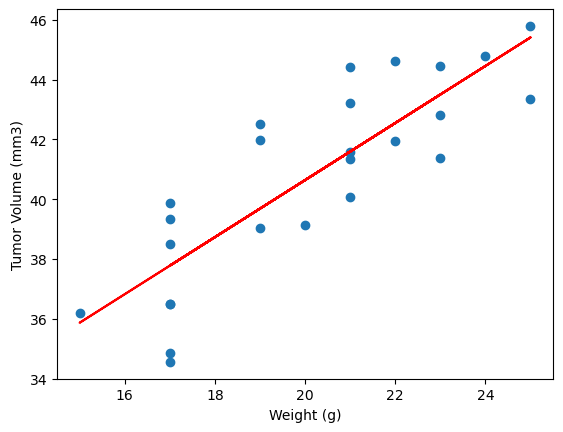

In [59]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight, avg_obs_tumor_vol)

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_value=avg_capomulin_df["Weight (g)"]
y_value=avg_capomulin_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_obs_tumor_vol)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


